# Regressão Linear Múltipla

# Conhecendo o Dataset
---

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste projeto é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Lendo os dados

In [ ]:
caminho = 'https://raw.githubusercontent.com/bruno-kalel/regressao-multipla-house-pricing/main/house-prices-halfmil.csv'

In [ ]:
dados = pd.read_csv(caminho, sep=';')

## Visualizando os dados

In [ ]:
dados.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


## Verificando o tamanho do dataset

In [ ]:
f'{dados.shape[0]} linhas e {dados.shape[1]} colunas'

'1000 linhas e 7 colunas'

# Análises Preliminares
---

## Estatísticas descritivas

In [ ]:
dados.describe().round()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,41986.0,124.0,2.0,3.0,2.0,0.0,0.0
std,12140.0,72.0,1.0,1.0,1.0,0.0,1.0
min,13150.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,33112.0,61.0,1.0,2.0,1.0,0.0,0.0
50%,41725.0,123.0,2.0,3.0,2.0,0.0,0.0
75%,51175.0,187.0,3.0,4.0,3.0,1.0,1.0
max,73675.0,249.0,3.0,5.0,4.0,1.0,1.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


Do autor:
* As variáveis mais correlacionadas com a variável dependente preço são `mármore` e `andares`, e seu relacionamento é positivo, ou seja, sobem juntas.
* Não existe correlação forte entre as variáveis explicativas.

# Comportamento da Variável Dependente (Y)
---

# Análises gráficas

## Importando biblioteca seaborn

In [ ]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: ylabel='precos'>

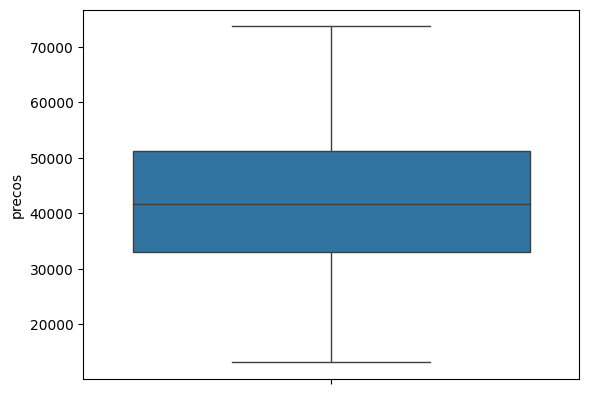

In [ ]:
sns.boxplot(dados.precos)

Do autor:
* Não parecem existir valores discrepantes (outliers)
* Visualmente, o box plot não parece apresentar alguma tendência alarmante (desvio da média, por exemplo)

## Investigando a variável *dependente* (y) juntamente com outras características (apenas categóricas)

### Box-plot (Preço versus Garagem)

<Axes: xlabel='garagem', ylabel='precos'>

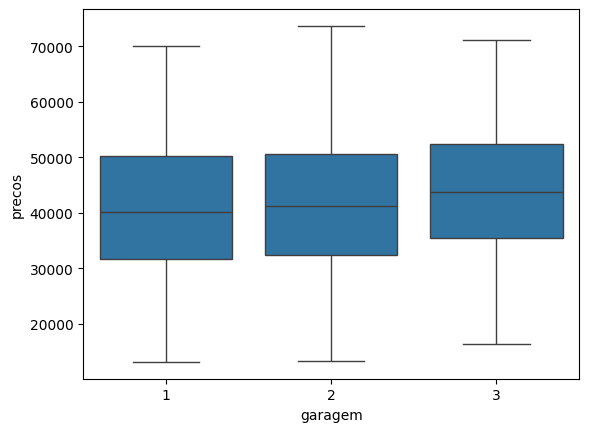

In [ ]:
sns.boxplot(y='precos', x='garagem', data=dados, orient='v')

Do autor:
* Percebem-se mudanças significativas leves, tendendo a subir, o que é natural, não apresentando uma tendência bem definida

### Box-plot (Preço versus Banheiros)

<Axes: xlabel='banheiros', ylabel='precos'>

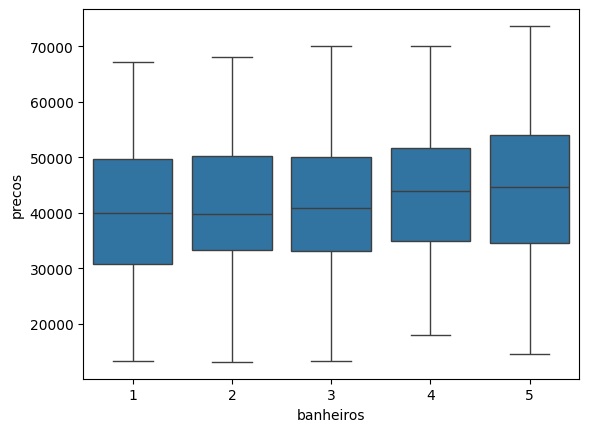

In [ ]:
sns.boxplot(y='precos', x='banheiros', data=dados, orient='v')

Do autor:
* Percebem-se mudanças significativas leves, tendendo a subir, o que é natural, não apresentando uma tendência bem definida

### Box-plot (Preço versus Lareira)

<Axes: xlabel='lareira', ylabel='precos'>

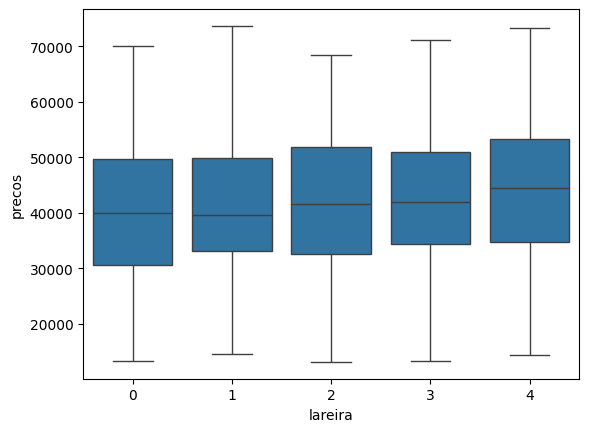

In [ ]:
sns.boxplot(y='precos', x='lareira', data=dados, orient='v')

Do autor:
* Percebem-se mudanças significativas leves, tendendo a subir, o que é natural, não apresentando uma tendência bem definida

### Box-plot (Preço versus Acabamento em Mármore)

<Axes: xlabel='marmore', ylabel='precos'>

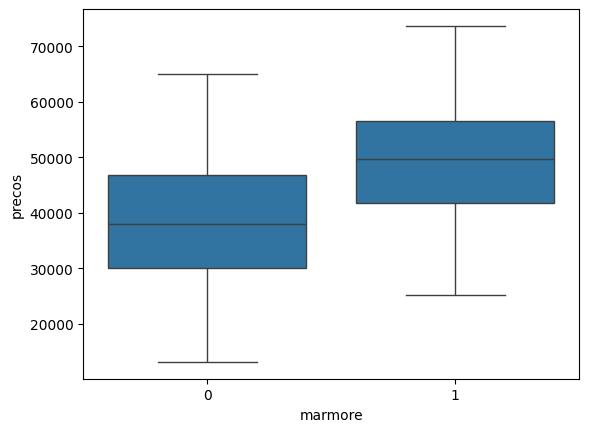

In [ ]:
sns.boxplot(y='precos', x='marmore', data=dados, orient='v')

Do autor:
* Percebem-se mudanças significativas fortes em relação à presença do acabamento em mármore, apresentando uma tendência bem definida

### Box-plot (Preço versus Andares)

<Axes: xlabel='andares', ylabel='precos'>

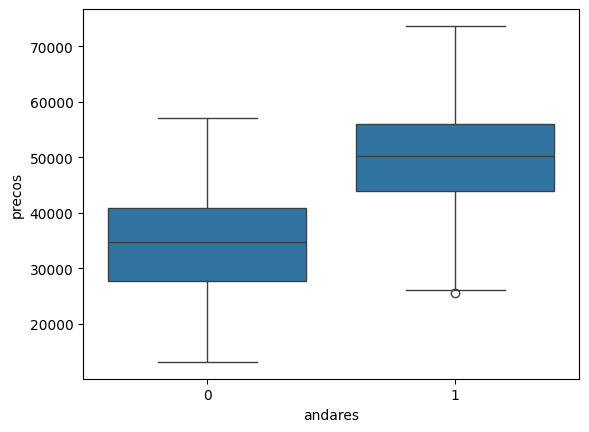

In [ ]:
sns.boxplot(y='precos', x='andares', data=dados, orient='v')

Do autor:
* Percebem-se mudanças significativas fortes em relação ao número de andares, apresentando uma tendência bem definida

## Distribuição de frequências da variável *dependente* (y)

Construindo um histograma da variável dependente (Preço).

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: xlabel='precos', ylabel='Count'>

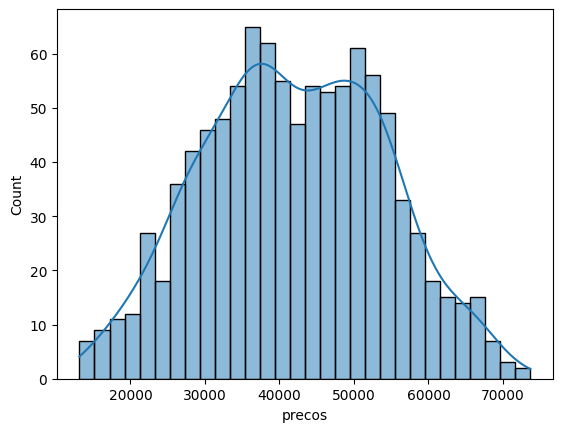

In [ ]:
sns.histplot(dados['precos'], kde=True, bins=30)

Do autor:
* A distribuição de frequências da variável dependente não parece ser assimétrica, ainda assim, faz-se necessária a aplicação de testes mais formais para confirmação da hipótese
* É possível supor que a variável dependente segue uma distribuição normal, porém, do mesmo modo, faz-se necessária a aplicação de testes mais formais para confirmação da hipótese

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

Plotando gráficos de dispersão da variável dependente contra cada variável explicativa.

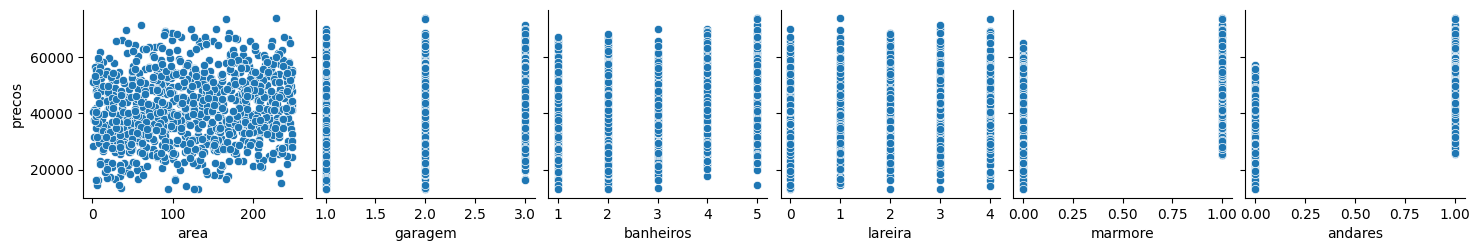

In [ ]:
sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])

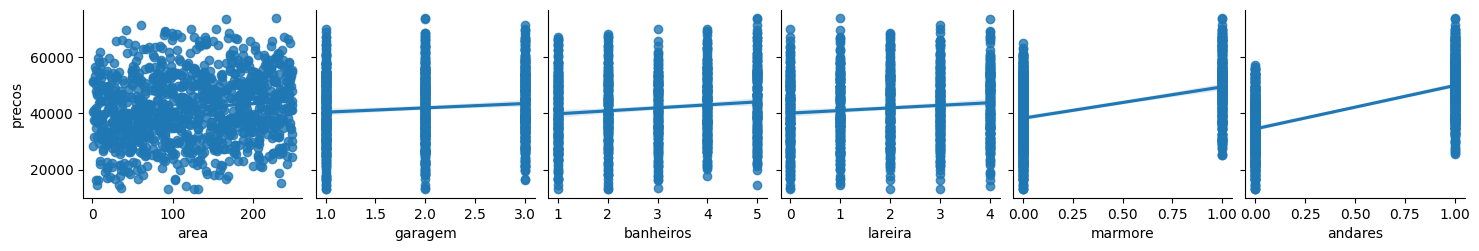

In [ ]:
sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')

Do autor:
* É possível identificar relação linear entre as variáveis
* Tal relação é positiva, as tendências são para cima
* A relação é mais forte nas variáveis `marmore` e `andares`, como visto anteriormente na matriz de correlação
* Existe uma relação na variável `area`, também. Contudo, pela distribuição visualizada, o coeficiente de determinação (R²) tenderá a ser mais baixo, o que não é desejável

# Estimando um Modelo de Regressão Linear
---

## Importando o *train_test_split* da biblioteca *scikit-learn*

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [ ]:
y = dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
x = dados.iloc[:, 1:]

## Criando os datasets de treino e de teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
model = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e x_train)

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [ ]:
f'R² = {model.score(x_train, y_train)}'

'R² = 0.6362135671678268'

Do autor:
* O modelo apresenta um R² de 64%, os dados possuem uma variação muito grande e isso atrapalha
* 64% da variação da variável dependente é possível de ser explicado pelas variáveis explicativas
* Seria legal ter mais variáveis e/ou amostras neste dataset, assim o R² poderia subir

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

In [ ]:
y_previsto = model.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [ ]:
f'R² = {metrics.r2_score(y_test, y_previsto)}'

'R² = 0.6699752959366423'

# Obtendo Previsões Pontuais
---

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [ ]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = pd.DataFrame(data=[[area, garagem, banheiros, lareira, marmore, andares]],
                       columns=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
entrada

,area,garagem,banheiros,lareira,marmore,andares
0,38,2,4,4,0,1


In [ ]:
model.predict(entrada)

array([46389.80475709])

# Métricas de Regressão
---

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

## Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

## Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

## Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto))
R2 = metrics.r2_score(y_test, y_previsto)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['métricas'])

,métricas
EQM,5.019702e+07
REQM,7.084985e+03
R²,6.699753e-01
